In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from lls import LinearLeastSquare
from sklearn.model_selection import train_test_split

In [16]:
# Load data
data = pd.read_csv("data/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
# Preprocess data
data["Sex"].replace(["F", "M", "I"], [0, 1, 2], inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [19]:
data = data.drop(["Sex"], axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


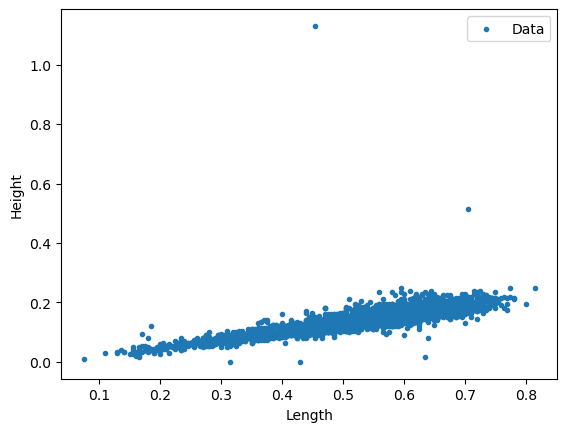

In [20]:
plt.scatter(data["Length"], data["Height"], marker='.')
plt.xlabel("Length")
plt.ylabel("Height")
plt.legend(["Data"])
plt.show()

In [21]:
X = np.array(data[["Length"]])
Y = np.array(data[["Height"]])

print(X.shape)
print(Y.shape)

(4177, 1)
(4177, 1)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3132, 1)
(3132, 1)
(1045, 1)
(1045, 1)


In [23]:
# Linear Least Squares

# w = inv(X.T @ X) @ X.T @ Y
# w

In [24]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

In [25]:
# Y_pred = X_test @ w

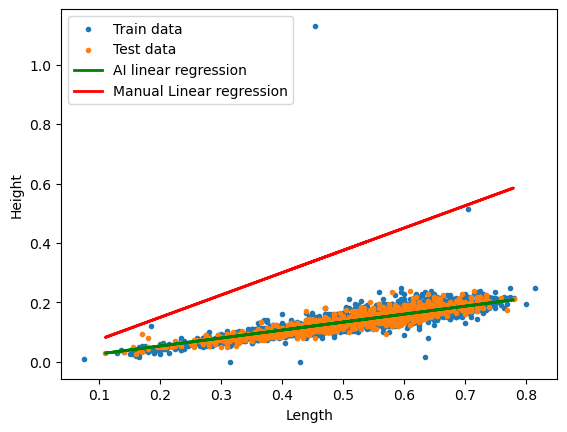

In [26]:

plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='green', lw=2)
plt.plot(X_test, 0.75 * X_test, color='red', lw=2)
plt.xlabel("Length")
plt.ylabel("Height")
plt.legend(["Train data", "Test data",
            "AI linear regression", "Manual Linear regression"], loc="upper left")
plt.show()

In [27]:
'''
# predict
x_test = 0.49 #length
y_pred = w * x_test
print("height:", y_pred)
'''

'\n# predict\nx_test = 0.49 #length\ny_pred = w * x_test\nprint("height:", y_pred)\n'

In [28]:
lls.evaluate(X_test, Y_test, "mae")

0.012342771016443514